In [1]:
!pip install watermark

In [2]:
%load_ext watermark
%watermark -u -d -p numpy,pandas,matplotlib

last updated: 2020-03-31 

numpy 1.18.1
pandas 1.0.3
matplotlib 3.2.1


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
class MyPerceptron(object):
    
    def __init__(self, learning_rate=0.01, epochs=50, random_state=1):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.random_state = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size= 1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            
            for xi, target in zip(X, y):
                # △w = (기대값 - 예측값) * 학습율 * 입력값
                update = self.learning_rate * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        

In [14]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [15]:
y = df.iloc[:100, 4].values

In [16]:
y = np.where(y == 'Iris-setosa', -1, 1)

In [17]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [18]:
X = df.iloc[:100, [0, 2]].values

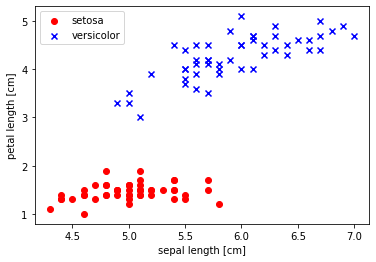

In [19]:
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

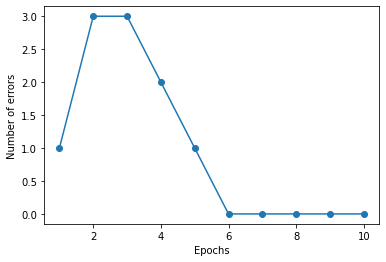

In [25]:
ppn = MyPerceptron(learning_rate=0.1, epochs=10)
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')

plt.show()

In [26]:
class MyAdaline(object):
    
    def __init__(self, learning_rate=0.01, epochs=50, random_state=1):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.random_state = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size= 1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.epochs):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            
            errors = (y - output)
            
            self.w_[1:] += self.learning_rate * X.T.dot(errors)
            self.w_[0] += self.learning_rate * errors.sum()
            
            cost = (errors ** 2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
        